# What Makes a Successful Kickstarter Campaign?

## Problem Statement

## Executive Summary

## Table of Contents

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read-In Data

Source: [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects)

In [2]:
df = pd.read_csv('../data/ks-projects-201801.csv')

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.shape

(378661, 15)

## Clean Data

### Check for Null/Missing Values

In [5]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

#### Remove Null Values

In [6]:
df.dropna(inplace = True)

### Check Data Types

In [7]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

#### Convert `ID` to a string

In [8]:
df['ID'] = df['ID'].map(str)

#### Convert `deadline` to a datetime object

In [9]:
df['deadline'] = pd.to_datetime(df['deadline'])

#### Convert `launched` to a datetime object

In [10]:
df['launched'] = pd.to_datetime(df['launched'])

### Drop `usd_pledged` column

In [11]:
df.drop(columns = ['usd pledged'], inplace = True)

### Title Case Outcomes in `state`

In [12]:
df['state'] = df['state'].str.title()

### Rename `state` to `Campaign Status`

In [13]:
df = df.rename(columns = {'state':'Campaign Status'})

### Limit Data to Only Campaigns in the USA

In [23]:
df = df[df['country'] == 'US']

## Exploratory Data Analysis

### Functions

#### Create a Count Plot

In [14]:
def plot_countplot(data, column, hue = None, orient = None, size = (10,6), title = '', x_label = '', y_label = '', color = 'limegreen', palette = None):
    plt.figure(figsize = size)
    sns.countplot(data[column], hue = hue, orient = orient, color = color, palette = palette, lw = 1.0, edgecolor = 'black');
    hfont = {'fontname': 'Helvetica Neue'}
    plt.xlabel(x_label, fontdict = {'fontsize':16}, labelpad = 8, **hfont)
    plt.ylabel(y_label, fontdict = {'fontsize':16}, labelpad = 8, **hfont)
    plt.title(title, fontdict = {'fontsize':20}, pad = 8, **hfont)
    plt.xticks(size = 13, **hfont)
    plt.yticks(size = 13, **hfont)
    plt.tight_layout();

### How many campaigns have succeeded vs. failed?

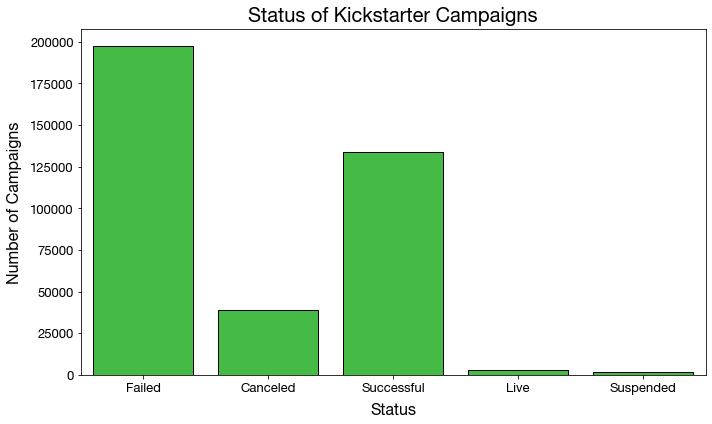

In [15]:
plot_countplot(data = df, 
               column = 'Campaign Status',
               title = 'Status of Kickstarter Campaigns',
               x_label = 'Status',
               y_label = 'Number of Campaigns')

#### Limit to Successful or Failed Campaigns

In [16]:
mask_failed = df['Campaign Status'] == 'Failed'
mask_success = df['Campaign Status'] == 'Successful'

df = df[mask_failed | mask_success]

### What types of projects are most successful?

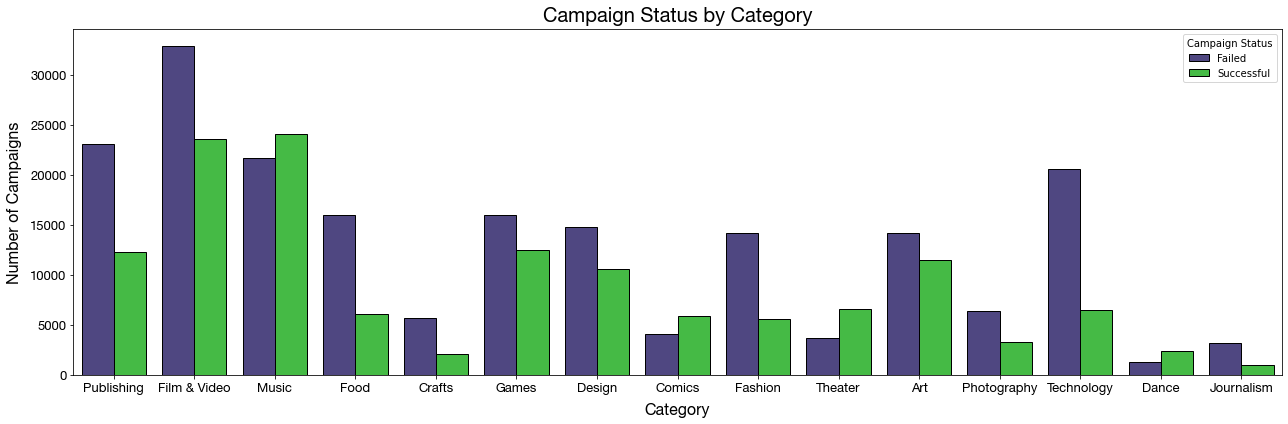

In [17]:
plot_countplot(data = df,
               column = 'main_category',
               hue = df['Campaign Status'],
               orient = 'h',
               size = (18, 6),
               color = None,
               palette = ['darkslateblue', 'limegreen'],
               title = 'Campaign Status by Category',
               x_label = 'Category',
               y_label = 'Number of Campaigns')

From the above figure, we can see that **Music** and **Dance** appear to have more successful campaigns than failed campaigns. We can explore the subcategories for each of these to see if one type of dance or genre of music is driving the results.

In [18]:
def get_subcategory(data, category):
    return df[df['main_category'] == category]

music_subs = get_subcategory(df, 'Music')
dance_subs = get_subcategory(df, 'Dance')

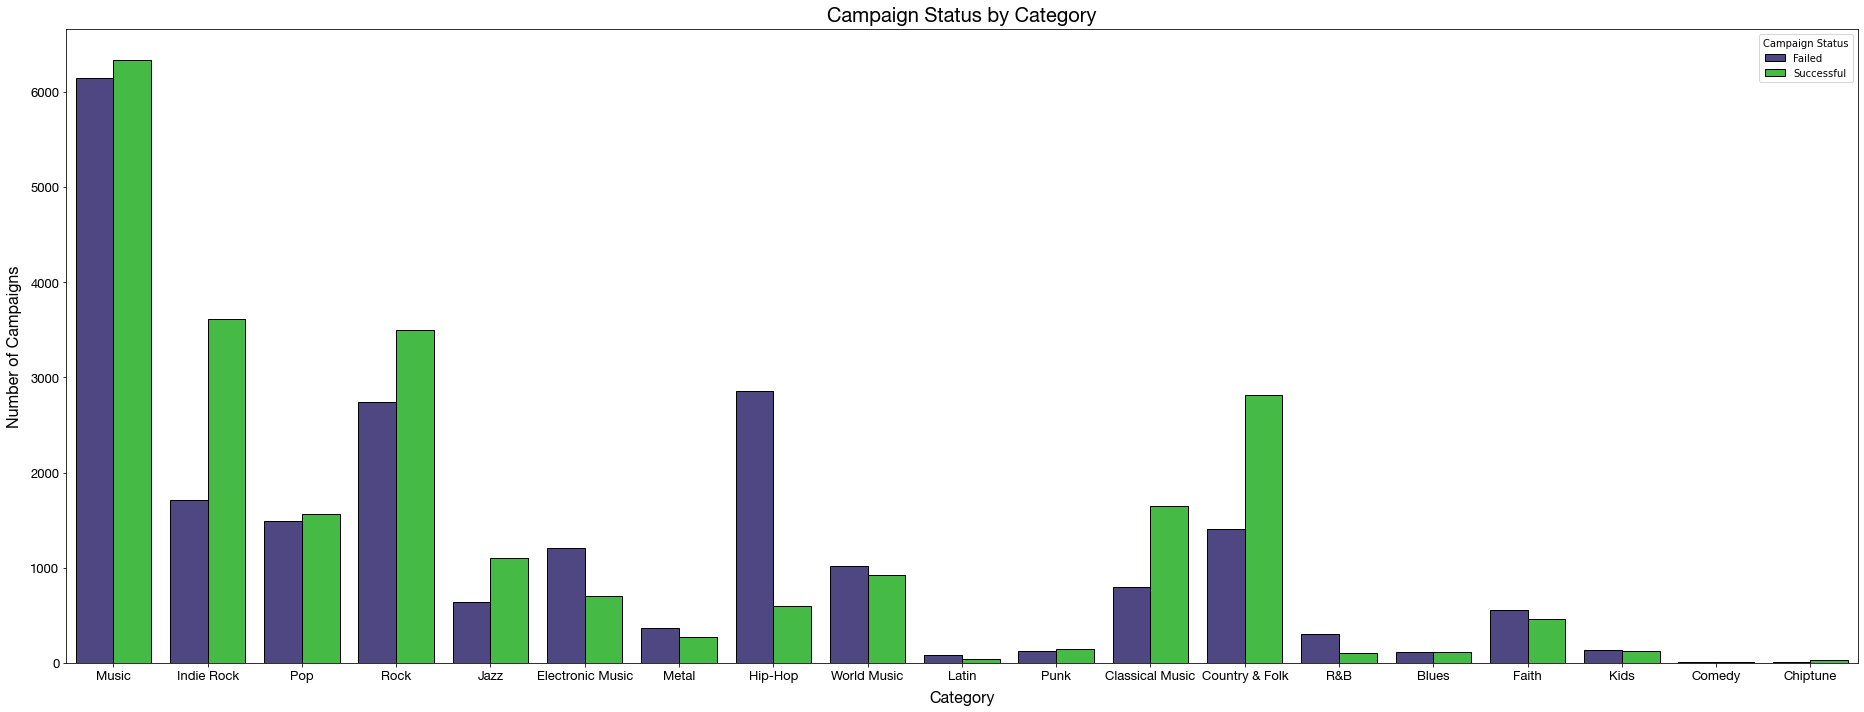

In [19]:
plot_countplot(data = music_subs,
               column = 'category',
               hue = music_subs['Campaign Status'],
               size = (26, 10),
               color = None,
               palette = ['darkslateblue', 'limegreen'],
               title = 'Campaign Status by Category',
               x_label = 'Category',
               y_label = 'Number of Campaigns')

In the above figure, we see that many genres of music appear to have more successful campaigns than failed campaigns, though it is unclear if all of the differences are statistically significant.

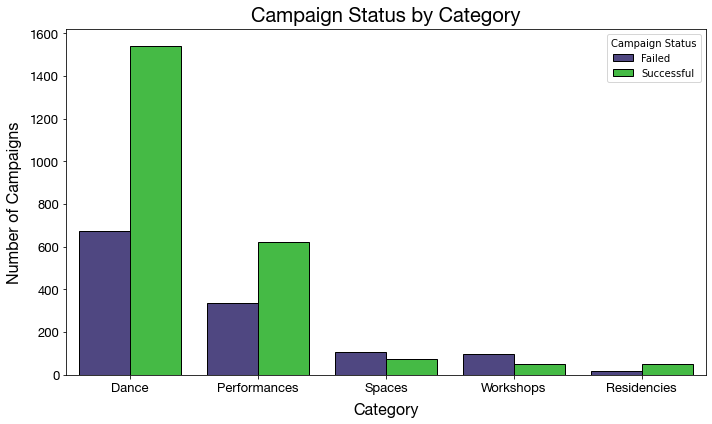

In [20]:
plot_countplot(data = dance_subs,
               column = 'category',
               hue = dance_subs['Campaign Status'],
               size = (10, 6),
               color = None,
               palette = ['darkslateblue', 'limegreen'],
               title = 'Campaign Status by Category',
               x_label = 'Category',
               y_label = 'Number of Campaigns')

In the above figure, we can see that general dance events and performances have more successful campaigns than failed campaigns.